In [1]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

1. Try varying n and see how that affects the accuracy.

### Linear Regression

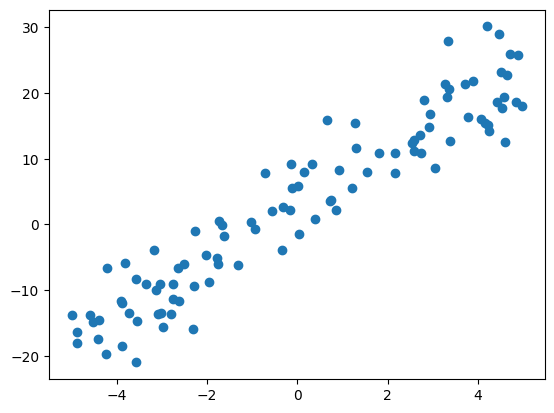

In [2]:
# Generate Random Data
n = 100
X = 10* np.random.random(n) - 5 # X in range (-5, 5)
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n) #Y is generated from the equation: Y = 4X + 3 + noise where noise is Gaussian with mean 0 and std deviation 5.

plt.figure()
plt.scatter(
    X,
    Y
)


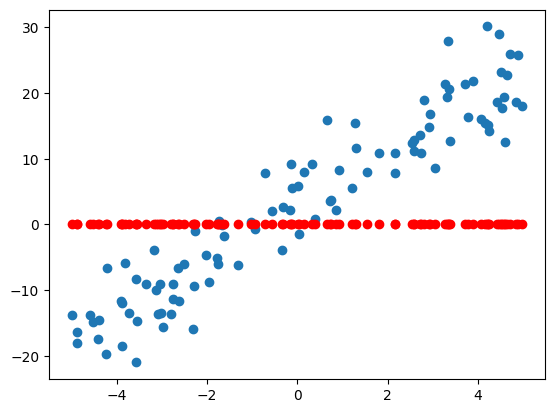

In [3]:
def Y_based_on_X(x,a,b):
  return a*x +b

# Gradient Descent
a,b = 0,0
l = 0.01

#define your descend function here

plt.figure()
plt.scatter(
    X,
    Y
)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")

In [4]:
# Closed form SOlution
# Go through this code. This code is just for learning the closed form solution
#This closed-form solution snippet implements Ordinary Least Squares (OLS) linear regression using matrix algebra, also known as the Normal Equation

X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X = np.matrix(X_0)
Y = np.matrix(Y)
beta = (X.T*X).I*X.T*Y.T

beta

matrix([[2.94297303],
        [4.10936988]])

When we reduce n (the number of data points), the model becomes more affected by random noise, so the estimated slope and intercept become less accurate. As we increase n, the estimates stabilize and get closer to the true values (4 and 3) because the larger dataset smooths out the noise.


2. Implement the same using GD.

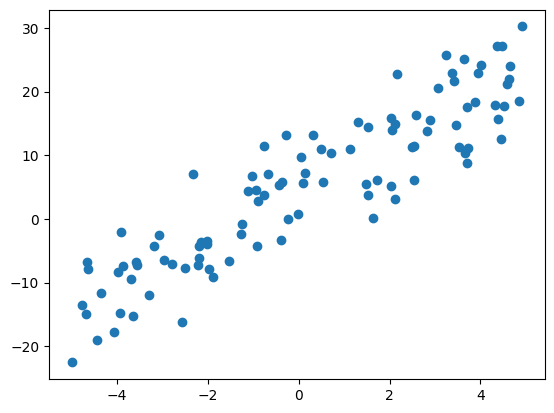

In [5]:
# Generate Random Data
n = 100
X = 10* np.random.random(n) - 5 # X in range (-5, 5)
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n) #Y is generated from the equation: Y = 4X + 3 + noise where noise is Gaussian with mean 0 and std deviation 5.

plt.figure()
plt.scatter(
    X,
    Y
)

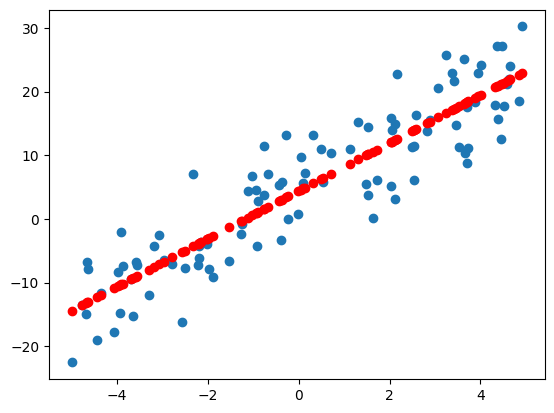

In [6]:
def Y_based_on_X(x,a,b):
  return a*x +b

# Gradient Descent
a,b = 0,0
l = 0.01

#define your descend function here
epochs = 1000

for epoch in range(epochs):
    Y_pred = a * X + b
    error = Y_pred - Y

    da = (2 / n) * np.sum(error * X)
    db = (2 / n) * np.sum(error)

    a -= l * da
    b -= l * db


plt.figure()
plt.scatter(
    X,
    Y
)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")

In [ ]:
a, b = 0, 0
l = 0.001  # learning rate
epochs = 1000

for epoch in range(epochs):
    Y_pred = a * X + b
    error = Y_pred - Y

    da = (2 / n) * np.sum(error * X)
    db = (2 / n) * np.sum(error)

    a -= l * da
    b -= l * db


Implement the same using SGD with m = 100 and n = 1000.

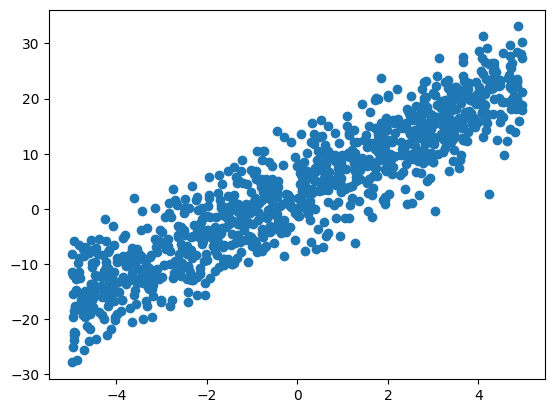

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
n = 1000
X = 10 * np.random.random(n) - 5  # X in range (-5, 5)
Y = 4 * X + 3 + np.random.normal(loc=0, scale=5, size=n)  # Y = 4X + 3 + noise

plt.figure()
plt.scatter(X, Y)


SGD result → a: 3.9440719212811546 b: 2.802376879536194


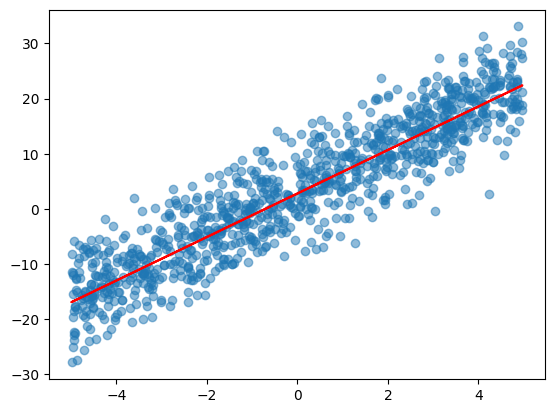

In [9]:
# Initialize parameters
a, b = 0, 0
l = 0.001  # learning rate
epochs = 100
m = 100  # mini-batch size

for epoch in range(epochs):
    # Shuffle data indices at the start of each epoch
    indices = np.arange(n)
    np.random.shuffle(indices)

    for start in range(0, n, m):
        end = start + m
        batch_indices = indices[start:end]

        X_batch = X[batch_indices]
        Y_batch = Y[batch_indices]

        Y_pred = a * X_batch + b
        error = Y_pred - Y_batch

        da = (2 / m) * np.sum(error * X_batch)
        db = (2 / m) * np.sum(error)

        a -= l * da
        b -= l * db

print("SGD result → a:", a, "b:", b)

# Plot results|
plt.figure()
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, Y_based_on_X(X, a, b), c='red')
plt.show()

Assignment 2

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [11]:
# Load the IRIS dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Filter only iris-versicolor (1) and iris-virginica (2)
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Convert labels: versicolor → 0, virginica → 1
y = (y == 2).astype(int)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def compute_loss(y, y_pred):
    epsilon = 1e-15  # to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [15]:
def train_logistic_regression(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    X = np.c_[np.ones(m), X]  # Add bias term (intercept)
    weights = np.zeros(n + 1)

    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        weights -= lr * gradient

        if epoch % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights


In [16]:
def predict(X, weights):
    m = X.shape[0]
    X = np.c_[np.ones(m), X]
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.5).astype(int)


In [17]:
weights = train_logistic_regression(X_train, y_train, lr=0.1, epochs=1000)
y_pred = predict(X_test, weights)
accuracy = np.mean(y_pred == y_test)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4116
Epoch 200: Loss = 0.3021
Epoch 300: Loss = 0.2451
Epoch 400: Loss = 0.2101
Epoch 500: Loss = 0.1861
Epoch 600: Loss = 0.1685
Epoch 700: Loss = 0.1550
Epoch 800: Loss = 0.1443
Epoch 900: Loss = 0.1354
Model Accuracy: 85.00%
